In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras

from tensorflow.keras.datasets   import cifar10
from tensorflow.keras.models     import Sequential, Model, clone_model
from tensorflow.keras.layers     import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils      import to_categorical
from sklearn.metrics             import confusion_matrix,classification_report
from sklearn.model_selection     import train_test_split

# Table of Content
* 0-) Data Reading
  * 0.1-) Data Analysis
  * 0.2-) Data Visualization
  * 0.3-) Data Preprocessig
    * 0.3.1-) Data Seperation
    * 0.3.2-) Seperatedd Data's Visualization
  * 0.4-) Some Functions to use late
* 1-) Modelling - model_1
* 2-) model_TL_1 - Freeze everything except output
* 3-) model_TL_2 - Fully connected layer is not frozen
* 4-) Extra Comparisons (for questions)

# 0-) Data Reading

## 0.1-) Data Analysis

In [2]:
target_size    = (32,32,3) # length, width, RGB
labels_cifar10 = {"airplane"   : 0, 
                  "automobile" : 1, 
                  "bird"       : 2, 
                  "cat"        : 3, 
                  "deer"       : 4, 
                  "dog"        : 5, 
                  "frog"       : 6, 
                  "horse"      : 7, 
                  "ship"       : 8, 
                  "truck"      : 9}

labels_cifar10_A = {"airplane"   : 0, 
                    "automobile" : 1, 
                    "bird"       : 2, 
                    "cat"        : 3, 
                    "deer"       : 4,}

labels_cifar10_B = {"dog"   : 0, 
                    "frog"  : 1, 
                    "horse" : 2, 
                    "ship"  : 3, 
                    "truck" : 4}

labels_cifar10_reversed = {value:key for key, value in labels_cifar10.items()}
print(labels_cifar10)
print(labels_cifar10_reversed)

print("\n================\n")

labels_cifar10_A_reversed = {value:key for key, value in labels_cifar10_A.items()}
print(labels_cifar10_A)
print(labels_cifar10_A_reversed)

print("\n================\n")

labels_cifar10_B_reversed = {value:key for key, value in labels_cifar10_B.items()}
print(labels_cifar10_B)
print(labels_cifar10_B_reversed)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4}
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer'}


{'dog': 0, 'frog': 1, 'horse': 2, 'ship': 3, 'truck': 4}
{0: 'dog', 1: 'frog', 2: 'horse', 3: 'ship', 4: 'truck'}


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [4]:
print(y_train.shape)
print(y_train.flatten().shape)

# Flatten label arrays
y_train = y_train.flatten()
y_val   = y_val.flatten()
y_test  = y_test.flatten()

(45000, 1)
(45000,)


In [5]:
#Lengths of data
print("x_train: %d" % len(x_train))
print("y_train: %d" % len(y_train))
print("x_val: %d" % len(x_val))
print("y_val: %d" % len(y_val))
print("x_test: %d" % len(x_test))
print("y_test: %d" % len(y_test))

x_train: 45000
y_train: 45000
x_val: 5000
y_val: 5000
x_test: 10000
y_test: 10000


In [6]:
#unique outputs:
print("Unique outputs: ")
for class_index in np.unique(y_train):
    print(class_index, labels_cifar10_reversed[class_index])

Unique outputs: 
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [7]:
#Shapes of data
print("x_train: "   + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print("x_val: "   + str(x_val.shape))
print("y_val: "   + str(y_val.shape))
print("x_test: "  + str(x_test.shape))
print("y_test: "  + str(y_test.shape))

x_train: (45000, 32, 32, 3)
y_train: (45000,)
x_val: (5000, 32, 32, 3)
y_val: (5000,)
x_test: (10000, 32, 32, 3)
y_test: (10000,)


## 0.2-) Data Visualization

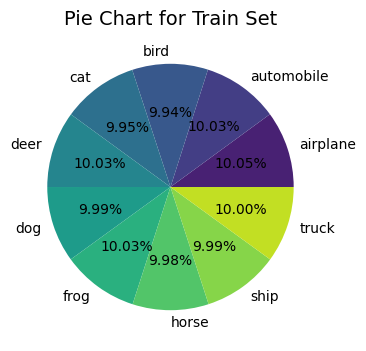

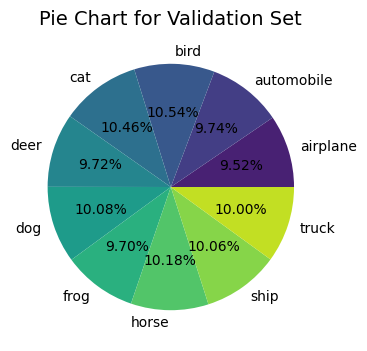

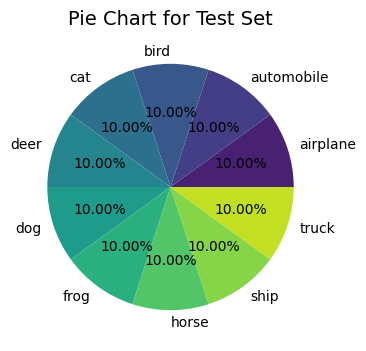

In [8]:
def plot_pie_chart(labels, reverse_labels, title_name):
    unique_labels, counts = np.unique(labels, return_counts=True)
    label_names_list = [reverse_labels[label] for label in unique_labels]

    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=label_names_list, autopct='%1.2f%%', colors=sns.color_palette("viridis", len(counts)))
    plt.title(f"Pie Chart for {title_name}", fontsize=14)
    plt.show()

plot_pie_chart(labels=y_train, 
               reverse_labels=labels_cifar10_reversed, 
               title_name="Train Set")
plot_pie_chart(labels=y_val,   
               reverse_labels=labels_cifar10_reversed, 
               title_name="Validation Set")
plot_pie_chart(labels=y_test,  
               reverse_labels=labels_cifar10_reversed, 
               title_name="Test Set")

---------- Train Set ----------


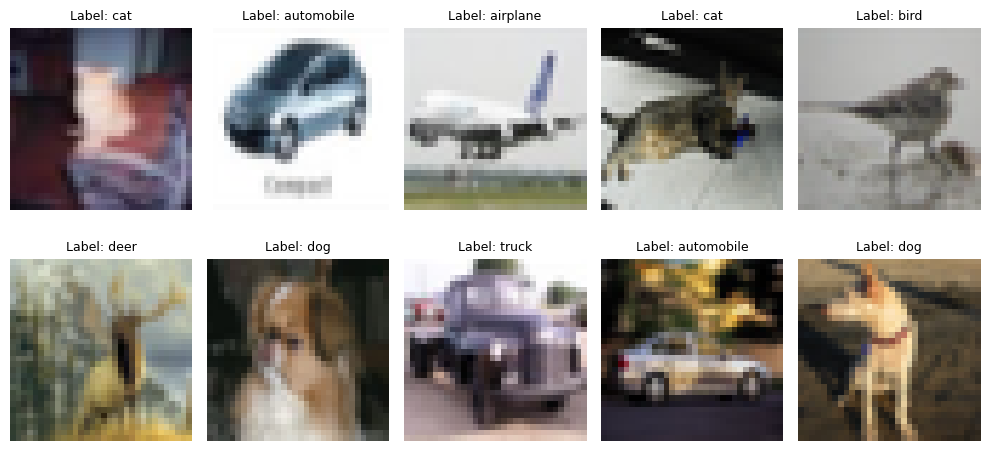

---------- Validation Set ----------


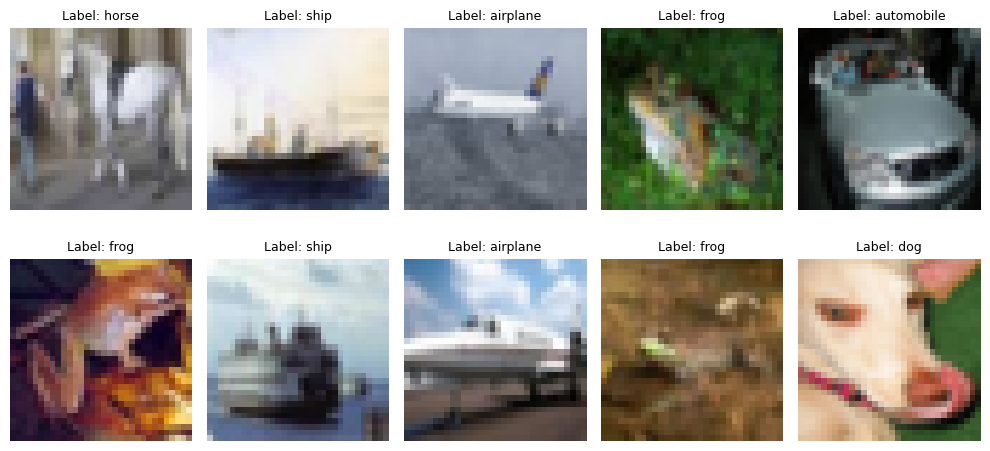

---------- Test Set ----------


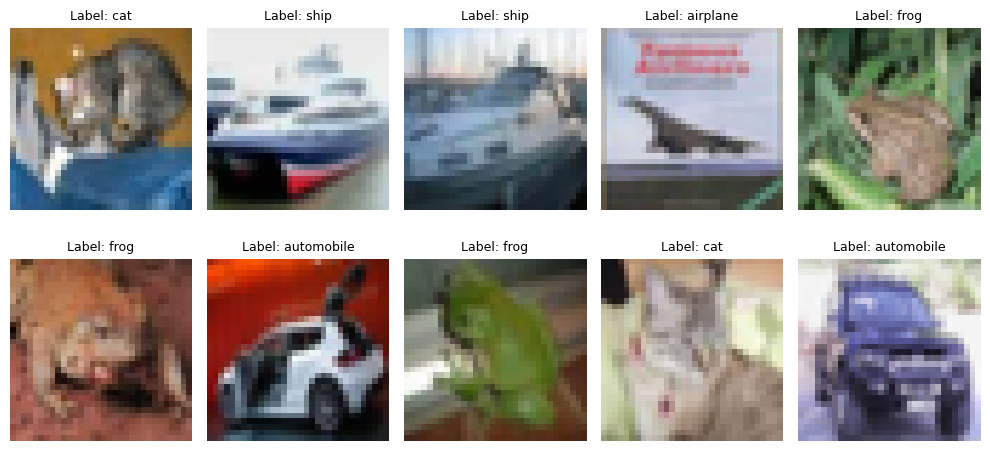

In [9]:
def visualize_img(title, data, labels, num, reverse_labels):
    print("---------- " + title + " ----------")
    plt.figure(figsize=(10, 5))
    for n in range(num):
        ax = plt.subplot(2, num // 2, n + 1)
        plt.imshow(data[n])
        plt.axis("off")
        label_id = int(labels[n])
        class_name = reverse_labels.get(label_id, str(label_id))
        ax.set_title(f"Label: {class_name}", fontsize=9)
    plt.tight_layout()
    plt.show()

visualize_img(title          = "Train Set", 
              data           = x_train, 
              labels         = y_train, 
              num            = 10, 
              reverse_labels = labels_cifar10_reversed)

visualize_img(title          = "Validation Set", 
              data           = x_val, 
              labels         = y_val, 
              num            = 10, 
              reverse_labels = labels_cifar10_reversed)

visualize_img(title          = "Test Set",
              data           =  x_test, 
              labels         = y_test, 
              num            = 10, 
              reverse_labels = labels_cifar10_reversed)


## 0.3-)Data Preprocessing

### 0.3.1-) Data Seperation

In [10]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
#Seperating into 2 groups

group_A_classes = [0,1,2,3,4]

#Filtering with mask

train_A_mask = np.isin(y_train, group_A_classes)
val_A_mask   = np.isin(y_val, group_A_classes)
test_A_mask  = np.isin(y_test, group_A_classes)

x_train_A = x_train[train_A_mask]
y_train_A = y_train[train_A_mask]

x_val_A = x_val[val_A_mask]
y_val_A = y_val[val_A_mask]

x_test_A = x_test[test_A_mask]
y_test_A = y_test[test_A_mask]


In [12]:
group_B_classes = [5,6,7,8,9]

#Filtering with mask

train_B_mask = np.isin(y_train, group_B_classes)
val_B_mask   = np.isin(y_val, group_B_classes)
test_B_mask  = np.isin(y_test, group_B_classes)

x_train_B = x_train[train_B_mask]
y_train_B = y_train[train_B_mask]

x_val_B = x_val[val_B_mask]
y_val_B = y_val[val_B_mask]

x_test_B = x_test[test_B_mask]
y_test_B = y_test[test_B_mask]

In [13]:
def print_array_example(data):    
    for i in range(3):
        print(data[i])
    print("\n")

In [14]:
#Before One-Hot Encoding
print("Example Data from Group A")
print_array_example(y_train_A)
print_array_example(y_val_A)
print_array_example(y_test_A)

print("Example Data from Group B")
print_array_example(y_train_B)
print_array_example(y_val_B)
print_array_example(y_test_B)

Example Data from Group A
3
1
0


0
1
0


3
0
1


Example Data from Group B
5
9
5


7
8
6


8
8
6




In [15]:
#We need to solve the problem in the Group B.
#We need to re-map group_B to use "to_categorical" function

# Map 5->0, 
#     6->1, 
#     7->2, 
#     8->3, 
#     9->4
label_map_B = {old: new for new, old in enumerate(group_B_classes)}

# Apply mapping
y_train_B = np.array([label_map_B[y] for y in y_train_B])
y_val_B   = np.array([label_map_B[y] for y in y_val_B])
y_test_B  = np.array([label_map_B[y] for y in y_test_B])

print("Example Data from Group B")
print_array_example(y_train_B)
print_array_example(y_val_B)
print_array_example(y_test_B)

Example Data from Group B
0
4
0


2
3
1


3
3
1




### 0.3.2-)Seperated Data's Visualization

============================== GROUP A ==============================


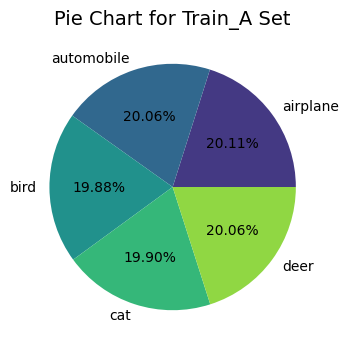

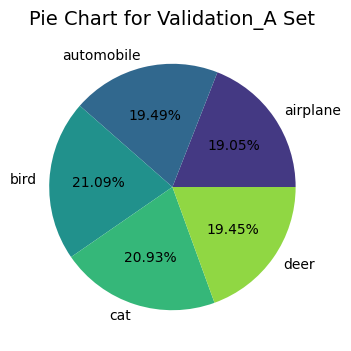

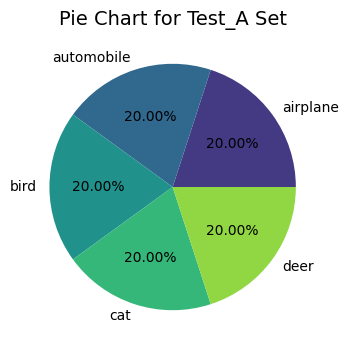

In [16]:
print("============================== GROUP A ==============================")
plot_pie_chart(labels=y_train_A, 
               reverse_labels=labels_cifar10_A_reversed, 
               title_name="Train_A Set")
plot_pie_chart(labels=y_val_A,   
               reverse_labels=labels_cifar10_A_reversed, 
               title_name="Validation_A Set")
plot_pie_chart(labels=y_test_A,  
               reverse_labels=labels_cifar10_A_reversed, 
               title_name="Test_A Set")

============================== GROUP B ==============================


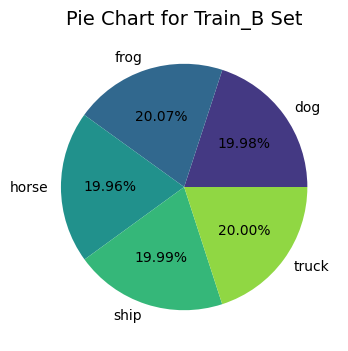

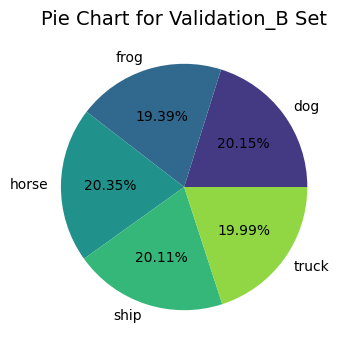

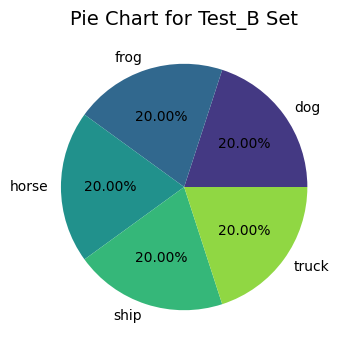

In [17]:
print("============================== GROUP B ==============================")
plot_pie_chart(labels=y_train_B, 
               reverse_labels=labels_cifar10_B_reversed, 
               title_name="Train_B Set")
plot_pie_chart(labels=y_val_B,   
               reverse_labels=labels_cifar10_B_reversed, 
               title_name="Validation_B Set")
plot_pie_chart(labels=y_test_B,  
               reverse_labels=labels_cifar10_B_reversed, 
               title_name="Test_B Set")

============================== GROUP A ==============================
---------- Train_A Set ----------


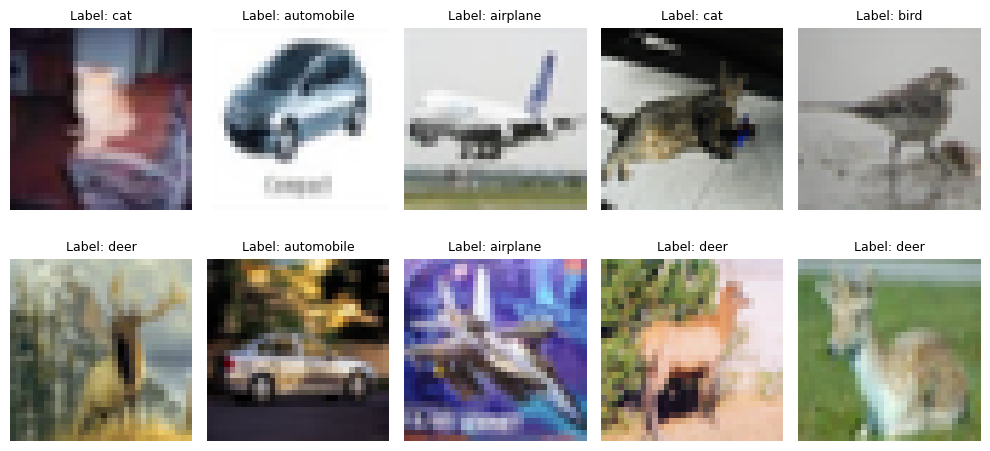

---------- Validation_A Set ----------


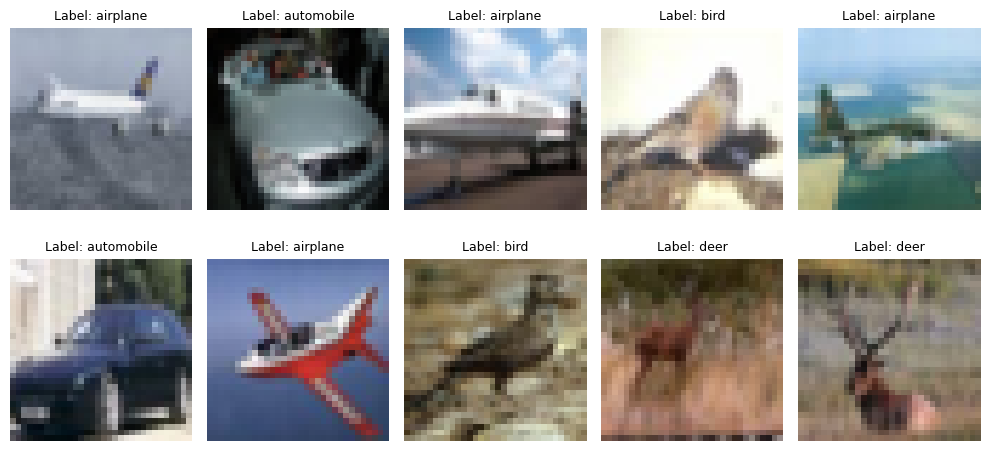

---------- Test_A Set ----------


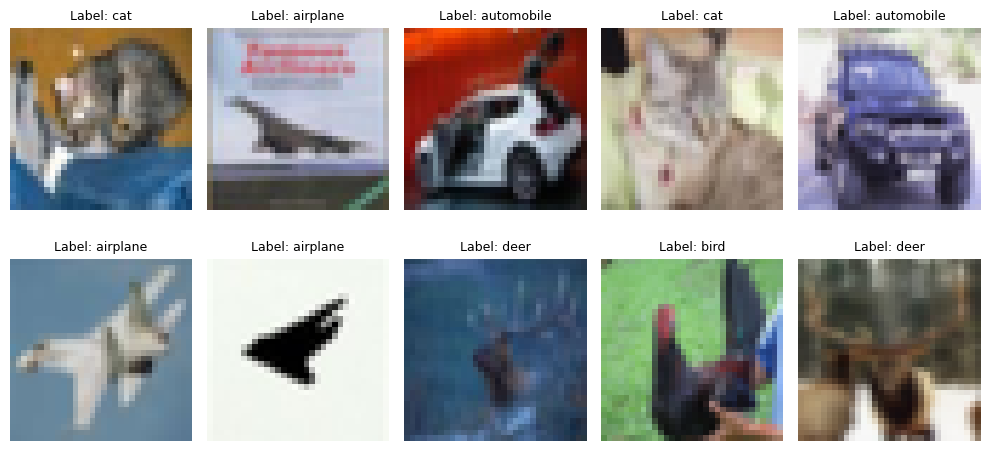

In [18]:
print("============================== GROUP A ==============================")
visualize_img(title          = "Train_A Set", 
              data           = x_train_A, 
              labels         = y_train_A, 
              num            = 10, 
              reverse_labels = labels_cifar10_A_reversed)

visualize_img(title          = "Validation_A Set", 
              data           = x_val_A, 
              labels         = y_val_A, 
              num            = 10, 
              reverse_labels = labels_cifar10_A_reversed)

visualize_img(title          = "Test_A Set",
              data           = x_test_A, 
              labels         = y_test_A, 
              num            = 10, 
              reverse_labels = labels_cifar10_A_reversed)

============================== GROUP B ==============================
---------- Train_B Set ----------


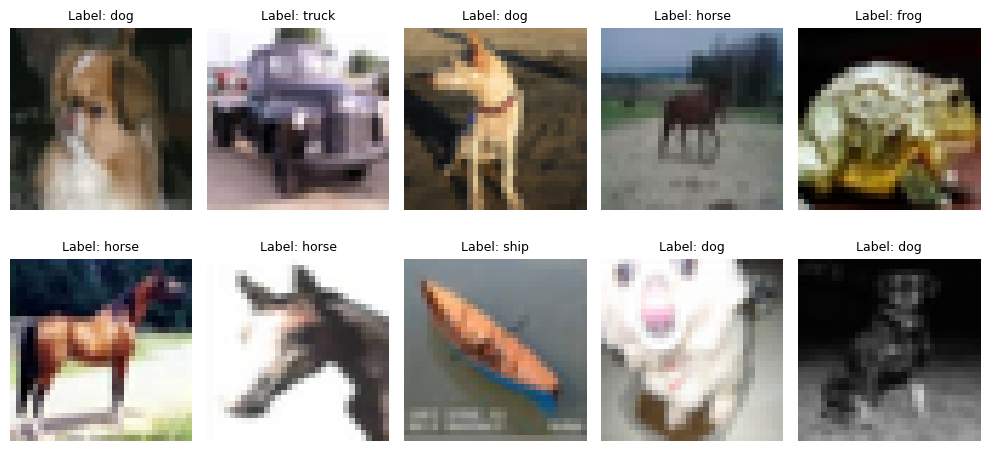

---------- Validation_B Set ----------


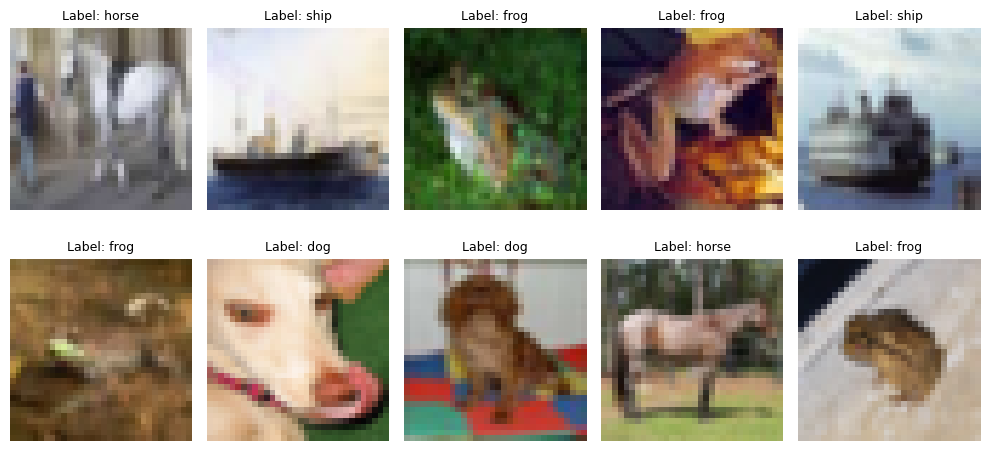

---------- Test_B Set ----------


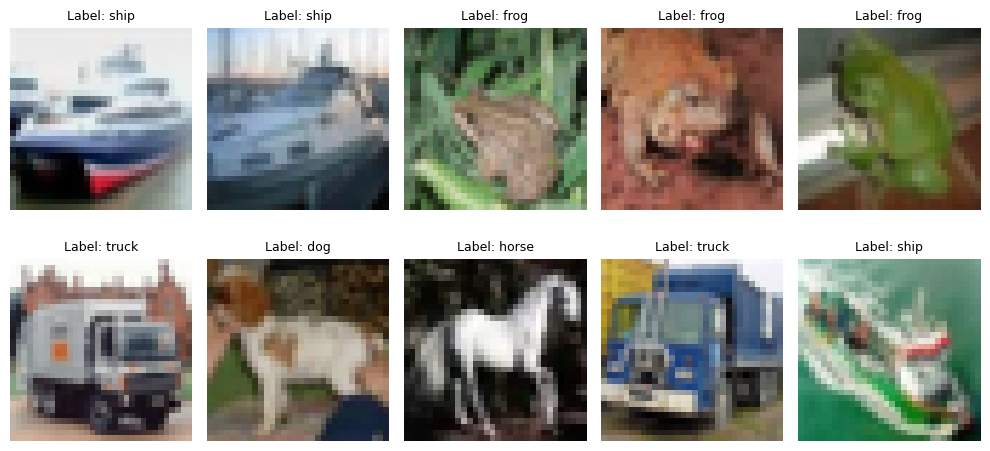

In [19]:
print("============================== GROUP B ==============================")
visualize_img(title          = "Train_B Set", 
              data           = x_train_B, 
              labels         = y_train_B, 
              num            = 10, 
              reverse_labels = labels_cifar10_B_reversed)

visualize_img(title          = "Validation_B Set", 
              data           = x_val_B, 
              labels         = y_val_B, 
              num            = 10, 
              reverse_labels = labels_cifar10_B_reversed)

visualize_img(title          = "Test_B Set",
              data           = x_test_B, 
              labels         = y_test_B, 
              num            = 10, 
              reverse_labels = labels_cifar10_B_reversed)

In [20]:
#One-Hot Encoding
num_of_classes_A = len(np.unique(y_train_A))
num_of_classes_B = len(np.unique(y_train_B))

print("num_of_classes_A: %d" % num_of_classes_A)
print("num_of_classes_B: %d" % num_of_classes_B)


y_train_A = to_categorical(y_train_A, num_of_classes_A)
y_val_A   = to_categorical(y_val_A  , num_of_classes_A)
y_test_A  = to_categorical(y_test_A , num_of_classes_A)

y_train_B = to_categorical(y_train_B, num_of_classes_B)
y_val_B   = to_categorical(y_val_B  , num_of_classes_B)
y_test_B  = to_categorical(y_test_B , num_of_classes_B)

num_of_classes_A: 5
num_of_classes_B: 5


In [21]:
def print_array_example(data):
    for i in range(5):
        print(data[i], " - ", np.argmax(data[i]))
    print("\n")

In [22]:
#After One-Hot Encoding
print("Example Data from Group A")
print_array_example(y_train_A)
print_array_example(y_val_A)
print_array_example(y_test_A)

print("Example Data from Group B")
print_array_example(y_train_B)
print_array_example(y_val_B)
print_array_example(y_test_B)

Example Data from Group A
[0. 0. 0. 1. 0.]  -  3
[0. 1. 0. 0. 0.]  -  1
[1. 0. 0. 0. 0.]  -  0
[0. 0. 0. 1. 0.]  -  3
[0. 0. 1. 0. 0.]  -  2


[1. 0. 0. 0. 0.]  -  0
[0. 1. 0. 0. 0.]  -  1
[1. 0. 0. 0. 0.]  -  0
[0. 0. 1. 0. 0.]  -  2
[1. 0. 0. 0. 0.]  -  0


[0. 0. 0. 1. 0.]  -  3
[1. 0. 0. 0. 0.]  -  0
[0. 1. 0. 0. 0.]  -  1
[0. 0. 0. 1. 0.]  -  3
[0. 1. 0. 0. 0.]  -  1


Example Data from Group B
[1. 0. 0. 0. 0.]  -  0
[0. 0. 0. 0. 1.]  -  4
[1. 0. 0. 0. 0.]  -  0
[0. 0. 1. 0. 0.]  -  2
[0. 1. 0. 0. 0.]  -  1


[0. 0. 1. 0. 0.]  -  2
[0. 0. 0. 1. 0.]  -  3
[0. 1. 0. 0. 0.]  -  1
[0. 1. 0. 0. 0.]  -  1
[0. 0. 0. 1. 0.]  -  3


[0. 0. 0. 1. 0.]  -  3
[0. 0. 0. 1. 0.]  -  3
[0. 1. 0. 0. 0.]  -  1
[0. 1. 0. 0. 0.]  -  1
[0. 1. 0. 0. 0.]  -  1




## 0.4-) Some functions to use later

In [23]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [24]:
def print_classification_report(model, x_test_set, y_test_set, label_names_list):
    y_pred = model.predict(x_test_set)
    y_pred_labels = np.argmax(y_pred, axis=1)  # one-hot --> class
    y_true_labels = np.argmax(y_test_set, axis=1)  # one-hot --> class

    print(classification_report(y_true_labels, y_pred_labels, target_names=label_names_list, digits=4))

In [25]:
def print_confusion_matrix(title, model, x_test_set, y_test_set, label_names_list):
    # Real and Predicted Labels
    y_true_labels = np.argmax(y_test_set, axis=1)
    y_pred_labels = np.argmax(model.predict(x_test_set), axis=1)
    
    # Confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    # Visualization with heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names_list, yticklabels=label_names_list)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - '+title)
    plt.show()

# 1-) Modelling - model_1

In [26]:
model_1 = Sequential([
    # Block 1 - Initial feature extraction
    Conv2D(filters=32,                 # Number of convolutional filters
           kernel_size=(3,3),          # Size of convolution window (3x3 pixels)
           activation='relu',          # ReLU activation
           padding='same',             # Adds zero for padding
           input_shape=target_size),   # Input shape
    
    MaxPooling2D(pool_size=(2,2),      # Window size for max pooling
                 strides=2),           # Step size for pooling (halves dimensions)
    Dropout(rate=0.2),                 # Randomly disable 20% of neurons
    
    # Block 2 - Intermediate feature learning
    Conv2D(filters=64,                 # More filters to learn more complex patterns
           kernel_size=(3,3), 
           activation='relu', 
           padding='same'),
    
    MaxPooling2D(pool_size=(2,2), 
                 strides=2),
    Dropout(rate=0.2),
    
    # Block 3 - Higher-level feature learning
    Conv2D(filters=128,                # More filters to learn more complex patterns
           kernel_size=(3,3), 
           activation='relu', 
           padding='same'),
    
    MaxPooling2D(pool_size=(2,2), 
                 strides=2),
    Dropout(rate=0.2),
    
    # Fully-Connected Layer
    Flatten(),                         # Convert 3D features to 1D vector
    Dense(units=512,                   # Fully connected layer with 512 neurons
          activation='relu'),          # ReLU activation
    Dropout(rate=0.3),                 # Randomly disable 30% of neurons
    
    Dense(units=num_of_classes_A,      # Output neurons = number of classes (5)
          activation='softmax')        # Probability distribution over classes
])

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


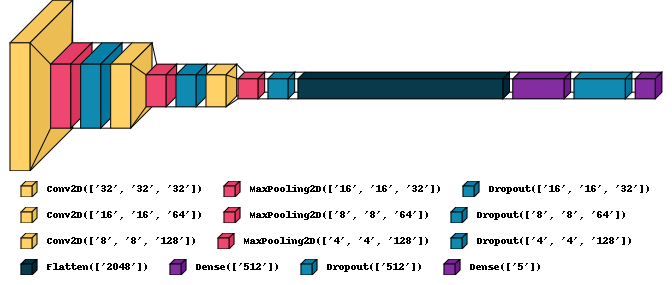

In [27]:
#Visualization of the layers:
visualkeras.layered_view(model_1, legend=True, show_dimension=True)

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [29]:
learning_rate = 0.001
batch_size    = 64
epochs        = 10
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=learning_rate),
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [30]:
history_model_1 = model_1.fit(
    x_train_A, y_train_A,
    batch_size     =batch_size,
    epochs         =epochs,
    verbose        =1,
    validation_data=(x_val_A, y_val_A))

Epoch 1/10
352/352 [==============================] - 4s 9ms/step - loss: 4.0098 - precision: 0.5067 - recall: 0.1485 - accuracy: 0.3551 - val_loss: 1.1461 - val_precision: 0.7969 - val_recall: 0.2025 - val_accuracy: 0.5554
Epoch 2/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1262 - precision: 0.6755 - recall: 0.3631 - accuracy: 0.5501 - val_loss: 0.9713 - val_precision: 0.7096 - val_recall: 0.4214 - val_accuracy: 0.5746
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 1.0159 - precision: 0.7159 - recall: 0.4418 - accuracy: 0.6039 - val_loss: 0.8885 - val_precision: 0.8600 - val_recall: 0.3934 - val_accuracy: 0.6863
Epoch 4/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9496 - precision: 0.7338 - recall: 0.4916 - accuracy: 0.6315 - val_loss: 0.8364 - val_precision: 0.8135 - val_recall: 0.4538 - val_accuracy: 0.6755
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9108 - precision: 0.7459 - r

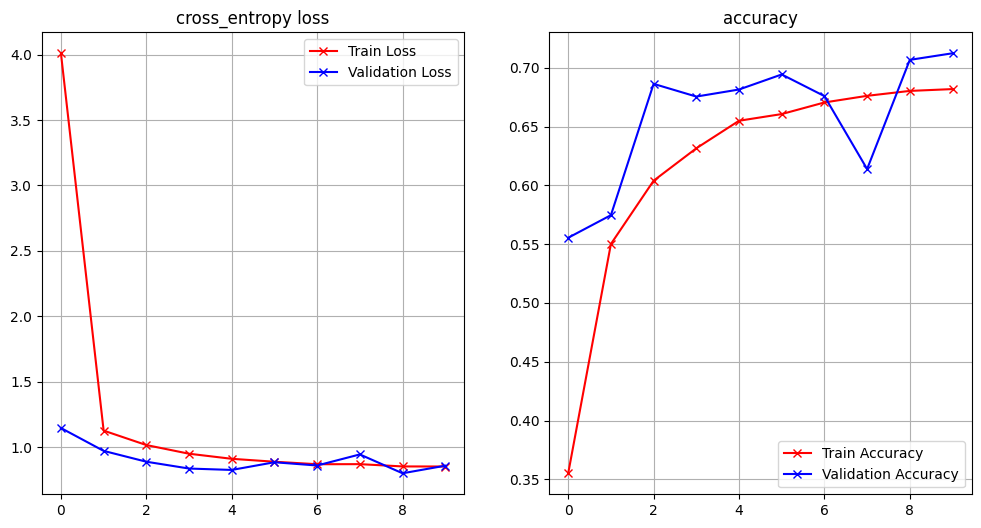

In [31]:
plot_loss_accuracy(history_model_1)

In [32]:
#control the order of metrics
model_1.metrics_names

['loss', 'precision', 'recall', 'accuracy']

In [33]:
test_loss, test_precision, test_recall, test_accuracy = model_1.evaluate(x_test_A, y_test_A, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 69.839996%

Test Loss: 86.159205%

Test Precision: 86.379927%

Test Recall: 43.379998%


In [34]:
print_classification_report(model            = model_1,
                            x_test_set       = x_test_A,
                            y_test_set       = y_test_A, 
                            label_names_list = labels_cifar10_A)

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    airplane     0.7893    0.7530    0.7707      1000
  automobile     0.8010    0.9620    0.8741      1000
        bird     0.7259    0.4210    0.5329      1000
         cat     0.5619    0.7260    0.6335      1000
        deer     0.6475    0.6300    0.6386      1000

    accuracy                         0.6984      5000
   macro avg     0.7051    0.6984    0.6900      5000
weighted avg     0.7051    0.6984    0.6900      5000



157/157 [==============================] - 0s 2ms/step


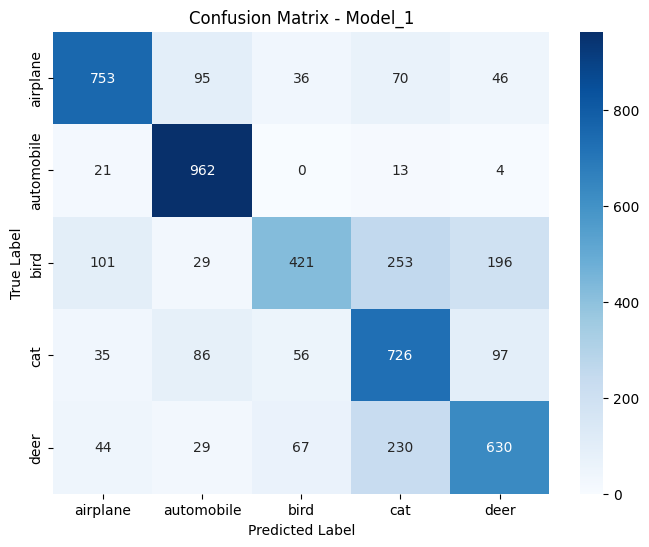

In [35]:
print_confusion_matrix(title            = "Model_1",
                       model            = model_1,
                       x_test_set       = x_test_A,
                       y_test_set       = y_test_A, 
                       label_names_list = labels_cifar10_A)

# 2-) Modelling - model_TL_1

In [36]:
model_1.layers

In [37]:
model_1.layers[:-1]

In [38]:
#We need to remove the fully-connected layer to start Transfer Learning

base_model = Sequential(model_1.layers)

# Transfer learning model
model_TL_1 = Sequential(base_model.layers)

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


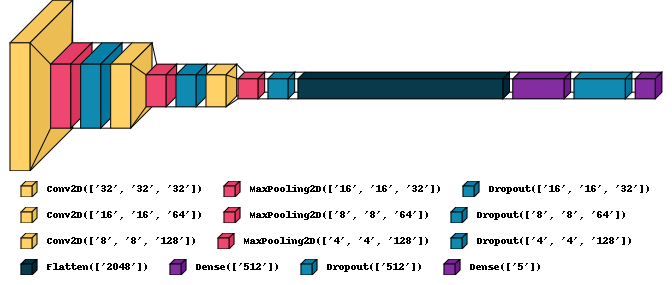

In [39]:
#Visualization of the layers:
visualkeras.layered_view(model_TL_1, legend=True, show_dimension=True)

In [40]:
model_TL_1.layers

In [41]:
model_TL_1.layers[:-1]

In [42]:
# Freeze layers Except output
for layer in model_TL_1.layers[:-1]:
    layer.trainable = False

In [43]:
model_TL_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [44]:
learning_rate = 0.001
model_TL_1.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=learning_rate),
                   metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

history_TL_1 = model_TL_1.fit(
    x_train_B, y_train_B,
    batch_size=64,
    epochs=30,
    validation_data=(x_val_B, y_val_B),
    verbose=1
)

Epoch 1/30
352/352 [==============================] - 3s 7ms/step - loss: 1.3339 - precision_1: 0.6313 - recall_1: 0.3009 - accuracy: 0.4950 - val_loss: 1.0050 - val_precision_1: 0.8579 - val_recall_1: 0.3067 - val_accuracy: 0.6701
Epoch 2/30
352/352 [==============================] - 2s 6ms/step - loss: 1.0457 - precision_1: 0.7159 - recall_1: 0.4008 - accuracy: 0.5937 - val_loss: 0.9693 - val_precision_1: 0.8465 - val_recall_1: 0.3307 - val_accuracy: 0.6793
Epoch 3/30
352/352 [==============================] - 2s 6ms/step - loss: 1.0297 - precision_1: 0.7154 - recall_1: 0.4151 - accuracy: 0.6028 - val_loss: 0.9582 - val_precision_1: 0.8449 - val_recall_1: 0.3355 - val_accuracy: 0.6729
Epoch 4/30
352/352 [==============================] - 2s 6ms/step - loss: 1.0186 - precision_1: 0.7236 - recall_1: 0.4271 - accuracy: 0.6113 - val_loss: 0.9543 - val_precision_1: 0.8430 - val_recall_1: 0.3543 - val_accuracy: 0.6509
Epoch 5/30
352/352 [==============================] - 2s 6ms/step - loss

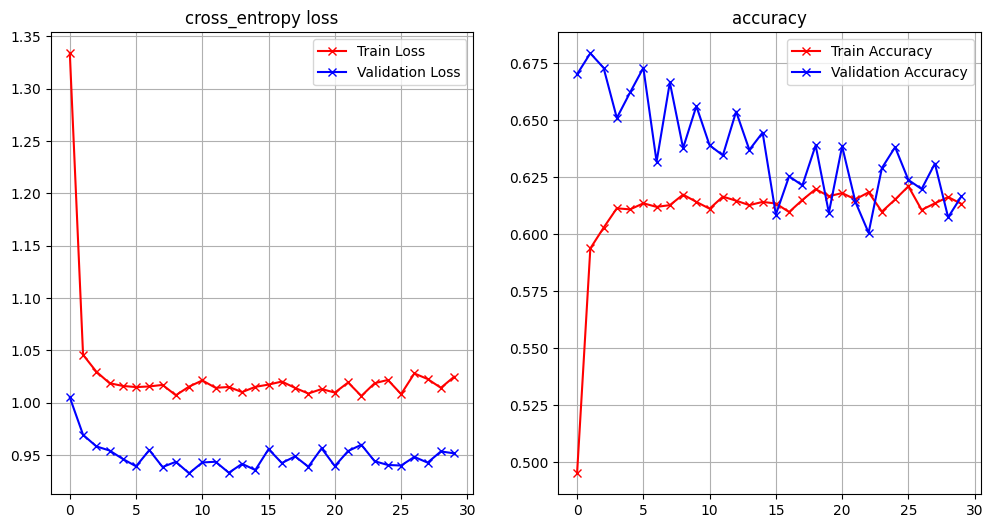

In [45]:
plot_loss_accuracy(history_TL_1)

In [46]:
test_loss, test_precision, test_recall, test_accuracy = model_TL_1.evaluate(x_test_B, y_test_B, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 61.640000%

Test Loss: 95.675254%

Test Precision: 81.123686%

Test Recall: 40.140000%


In [47]:
print_classification_report(model            = model_TL_1,
                            x_test_set       = x_test_B,
                            y_test_set       = y_test_B, 
                            label_names_list = labels_cifar10_B)

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         dog     0.7483    0.3210    0.4493      1000
        frog     0.4272    0.9030    0.5800      1000
       horse     0.6797    0.4330    0.5290      1000
        ship     0.7602    0.7450    0.7525      1000
       truck     0.8095    0.6800    0.7391      1000

    accuracy                         0.6164      5000
   macro avg     0.6850    0.6164    0.6100      5000
weighted avg     0.6850    0.6164    0.6100      5000



157/157 [==============================] - 0s 2ms/step


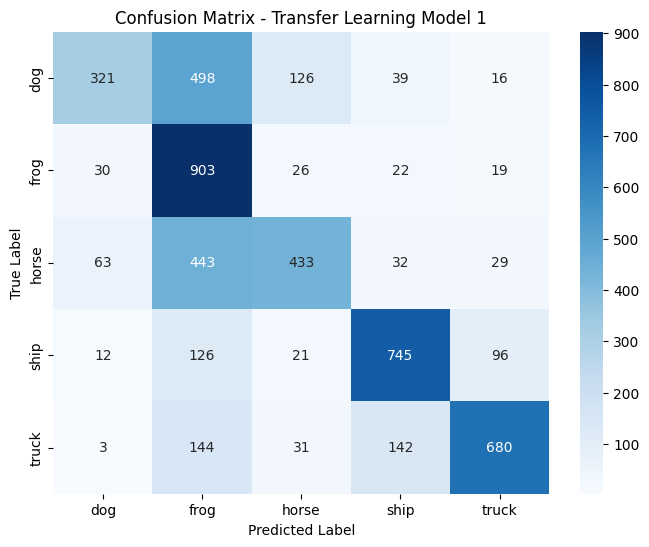

In [48]:
print_confusion_matrix(title            = "Transfer Learning Model 1",
                       model            = model_TL_1,
                       x_test_set       = x_test_B,
                       y_test_set       = y_test_B, 
                       label_names_list = labels_cifar10_B)

# 3-) Modelling - model_TL_2

In [49]:
base_model.layers

In [50]:
# Transfer learning model
base_model = Sequential(model_1.layers)
model_TL_2 = Sequential(base_model.layers)

c:\Users\Giray\Desktop\deep learning lecture assignments\tensorflow_env\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


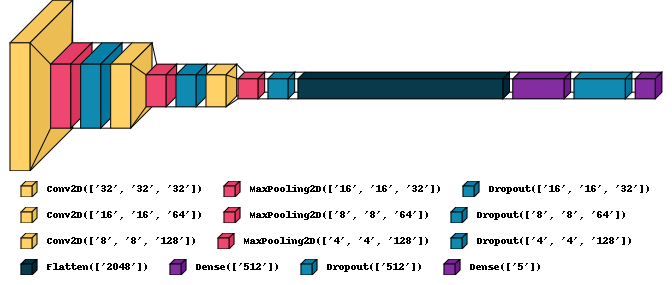

In [51]:
#Visualization of the layers:
visualkeras.layered_view(model_TL_2, legend=True, show_dimension=True)

In [52]:
model_TL_2.layers

In [53]:
model_TL_2.layers[:-3]

In [54]:
# Freeze layers until Flatten(including)
for layer in model_TL_2.layers[:-3]:
    layer.trainable = False

for layer in model_TL_2.layers[-3:]:  # Dense(512), Dropout, Dense(5)
    layer.trainable = True

In [55]:
model_TL_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [56]:
learning_rate = 0.001
model_TL_2.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=learning_rate),
                   metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

history_TL_2 = model_TL_2.fit(
    x_train_B, y_train_B,
    batch_size=64,
    epochs=30,
    validation_data=(x_val_B, y_val_B),
    verbose=1
)

Epoch 1/30
352/352 [==============================] - 3s 7ms/step - loss: 1.0044 - precision_2: 0.7145 - recall_2: 0.5185 - accuracy: 0.6339 - val_loss: 0.8374 - val_precision_2: 0.7839 - val_recall_2: 0.5194 - val_accuracy: 0.6717
Epoch 2/30
352/352 [==============================] - 2s 6ms/step - loss: 0.9404 - precision_2: 0.7334 - recall_2: 0.5536 - accuracy: 0.6563 - val_loss: 0.8937 - val_precision_2: 0.7728 - val_recall_2: 0.4842 - val_accuracy: 0.6309
Epoch 3/30
352/352 [==============================] - 2s 6ms/step - loss: 0.9155 - precision_2: 0.7506 - recall_2: 0.5637 - accuracy: 0.6715 - val_loss: 0.8323 - val_precision_2: 0.7797 - val_recall_2: 0.5406 - val_accuracy: 0.6749
Epoch 4/30
352/352 [==============================] - 2s 6ms/step - loss: 0.8916 - precision_2: 0.7560 - recall_2: 0.5790 - accuracy: 0.6792 - val_loss: 0.8050 - val_precision_2: 0.8029 - val_recall_2: 0.5554 - val_accuracy: 0.6861
Epoch 5/30
352/352 [==============================] - 2s 6ms/step - loss

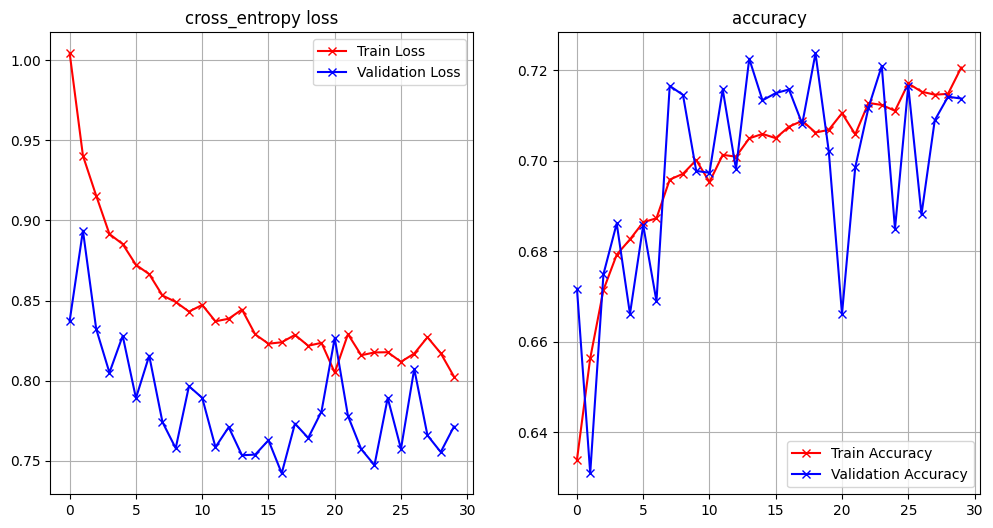

In [57]:
plot_loss_accuracy(history_TL_2)

In [58]:
test_loss, test_precision, test_recall, test_accuracy = model_TL_2.evaluate(x_test_B, y_test_B, verbose=False)
print("\nTest Accuracy: %.6f%%" % (100.0*test_accuracy))
print("\nTest Loss: %.6f%%" % (100.0*test_loss))
print("\nTest Precision: %.6f%%" % (100.0*test_precision))
print("\nTest Recall: %.6f%%" % (100.0*test_recall))


Test Accuracy: 70.339996%

Test Loss: 76.174474%

Test Precision: 80.244237%

Test Recall: 59.139997%


In [59]:
print_classification_report(model            = model_TL_2,
                            x_test_set       = x_test_B,
                            y_test_set       = y_test_B, 
                            label_names_list = labels_cifar10_B)

157/157 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         dog     0.7960    0.4020    0.5342      1000
        frog     0.5102    0.9500    0.6639      1000
       horse     0.8147    0.5670    0.6686      1000
        ship     0.8150    0.8370    0.8259      1000
       truck     0.8363    0.7610    0.7969      1000

    accuracy                         0.7034      5000
   macro avg     0.7544    0.7034    0.6979      5000
weighted avg     0.7544    0.7034    0.6979      5000



157/157 [==============================] - 0s 1ms/step


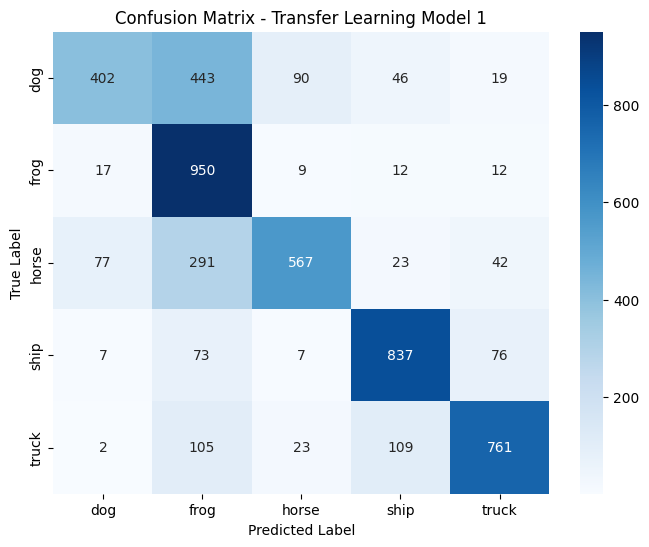

In [60]:
print_confusion_matrix(title            = "Transfer Learning Model 1",
                       model            = model_TL_2,
                       x_test_set       = x_test_B,
                       y_test_set       = y_test_B, 
                       label_names_list = labels_cifar10_B)

# 4-) Extra Comparisons

### 4.1-) How many trainable parameters are there in each case?

* model_TL_1 (everything except output layer is frozen)
  * Total params: 1,144,901
  * Trainable params: 2,565
  * Non-trainable params: 1,142,336

* model_TL_2 (Fully connected layer is not frozen)
  * Total params: 1,144,901
  * Trainable params: 1,051,653
  * Non-trainable params: 93,248

### 4.2-) Which fine-tuning performs better in terms of classification accuracy and why? 

**model_TL_1**

============  Test Set - model_TL_1 -Freeze everything except output  ============

* Accuracy: 61.640000%
* Loss    : 95.675254%

======================================================================================

**model_TL_2**

============  Test Set - model_TL_2 - Fully connected layer is not frozen  ============

* Accuracy: 70.339996%
* Loss    : 76.174474%

### 4.3-) Why is fine-tuning much faster than the initial training of the network? 

- model_TL_1: All layers are frozen except the output layer.

- model_TL_2: Only the convolutional layers are frozen; the fully connected and output layers remain trainable.

Although both models achieve similar performance on this dataset, model_TL_1 trains faster than model_TL_2 due to having significantly fewer trainable parameters. The performance and speed difference is not very prominent in this specific case because the dataset is relatively small and the model architecture is not highly complex.

However, in larger-scale models and datasets, this difference becomes more substantial — more trainable parameters typically result in longer training times and higher computational cost.